In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['axes.linewidth'] = .5
plt.rcParams['xtick.major.width'] = .5
plt.rcParams['ytick.major.width'] = .5
plt.rcParams['xtick.minor.width'] = .0
plt.rcParams['ytick.minor.width'] = .0
plt.rcParams['axes.labelpad'] = 1
plt.rcParams['axes.titlepad'] = 3
plt.rcParams['font.size'] = 6

Populating the interactive namespace from numpy and matplotlib


In [15]:
from pathlib import Path
from json import loads
import os

# absolute path
my_path = Path(os.path.abspath('')).parent.resolve().expanduser()
main_path = my_path.parent.parent

# evae result dir paths
evae_path = main_path / 'results' / 'evae_mnist'
models = ['kl_100ep_z10_e0.1_s0_lr0.0005_incr2', 'kl_100ep_z10_e0.1_s0', 'kl_100ep_z10_e0.1_s0_lr0.001_incr2', 'kl_100ep_z10_e0.1_s0_lr0.001_incr4']
results_dirs = [evae_path / model for model in models]

# collect hyperparameters
keys = ['lr', 'epsvae_interval_incr_L']
hyperparams = [[loads(Path(res_dir / 'specs.json').read_bytes())[key] for key in keys] for res_dir in results_dirs]

In [28]:
import pandas

# sizes
epochs = 100
batchs = len(range(0, 60000 * epochs, 64))

# collect data
hist_rec = np.zeros((len(results_dirs), epochs))
hist_KL = np.zeros((len(results_dirs), epochs))
hist_loss = np.zeros((len(results_dirs), epochs))
hist_lambda = np.zeros((len(results_dirs), epochs))
for idir, res_dir in enumerate(results_dirs):
    row = 0
    fname = res_dir / f'train_losses.log'
    data = pandas.read_csv(fname, index_col='Loss')

    
    # for epoch in range(epochs):
    #     data = np.loadtxt(fname, skiprows=1)
    #     hist_rec[idir, epoch] = data[:, 1]
    #     hist_KL[idir, epoch] = data[:, 2]
    #     hist_loss[idir, epoch] = data[:, -3]
    #     hist_lambda[idir, epoch] = data[:, -2]
        # print(f'DONE: {epoch}', end='\r')
    print(f'DONE: {res_dir}')
print(hist_loss.shape)

                 Epoch       Value
Loss                              
training_lambda      0    0.000000
recon_loss           0  209.304345
kl_loss              0   22.333858
kl_loss_0            0    2.525710
kl_loss_1            0    2.051343
...                ...         ...
kl_loss_8           99    0.588781
kl_loss_9           99    0.761770
loss                99  174.095763
lambda              99    3.544496
lambda_lr           99    0.000311

[1600 rows x 2 columns]
DONE: C:\Users\rsz6848503\SciML\disentangling-vae\results\evae_mnist\kl_100ep_z10_e0.1_s0_lr0.0005_incr2
                 Epoch       Value
Loss                              
training_lambda      0    0.105263
recon_loss           0  210.183933
kl_loss              0   21.032166
kl_loss_0            0    2.378257
kl_loss_1            0    1.972854
...                ...         ...
kl_loss_8           99    0.433610
kl_loss_9           99    0.644814
loss                99  181.065590
lambda              99    4.22

In [20]:
# plot
def plot_history_various_hyperparams(hist):
    fig, axes = plt.subplots(nrows=2, ncols=2, dpi=200, facecolor='w')
    plt.subplots_adjust(wspace=.2, hspace=.3)
    for i in range(2):
        for j in range(2):
            lr = hyperparams[2*i + j][0]
            interval = hyperparams[2*i + j][1]
            axes[i, j].plot(hist[2*i + j].mean(axis=0), lw=.2)
            axes[i, j].set_title(f'lr = {lr}, interval_incr_L = {interval}')
    plt.show()

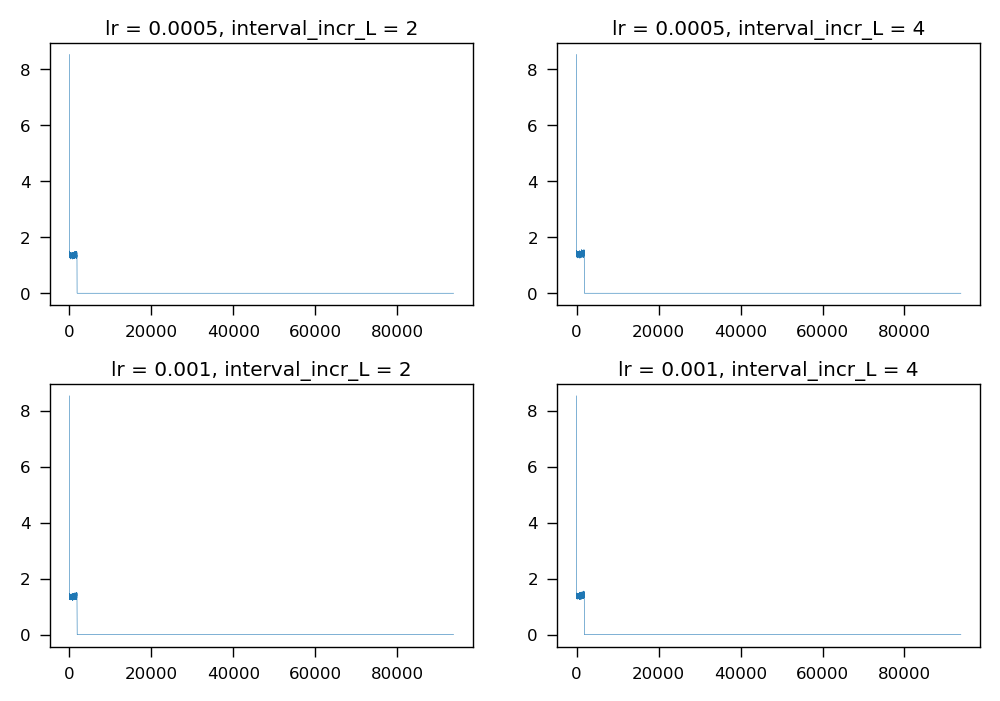

In [21]:
plot_history_various_hyperparams(hist_rec)

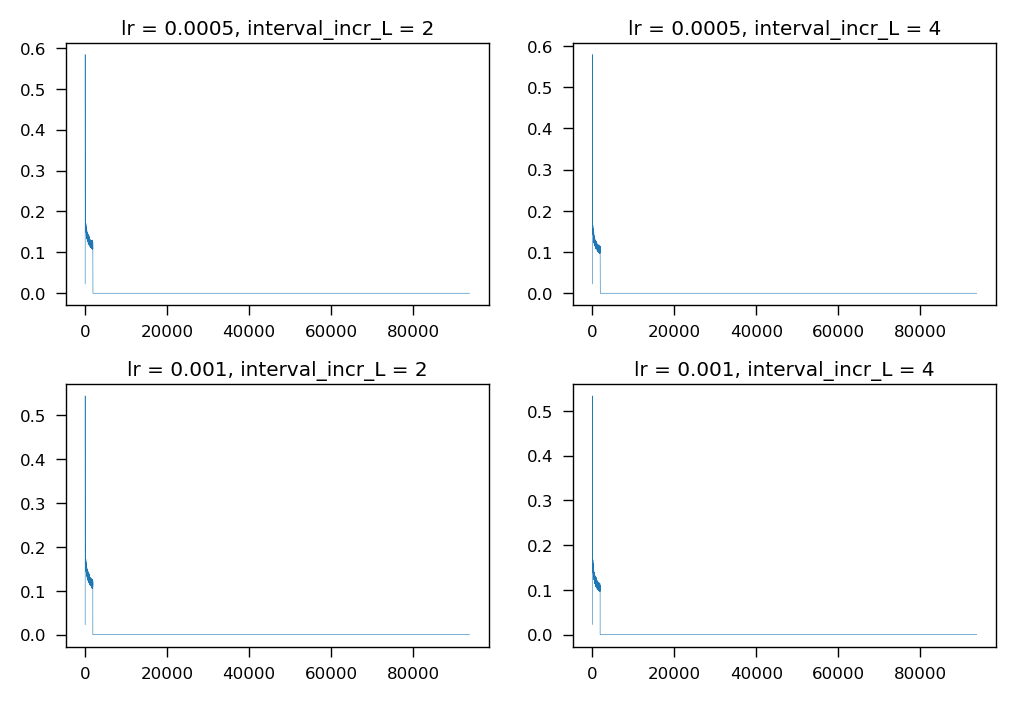

In [22]:
plot_history_various_hyperparams(hist_KL)

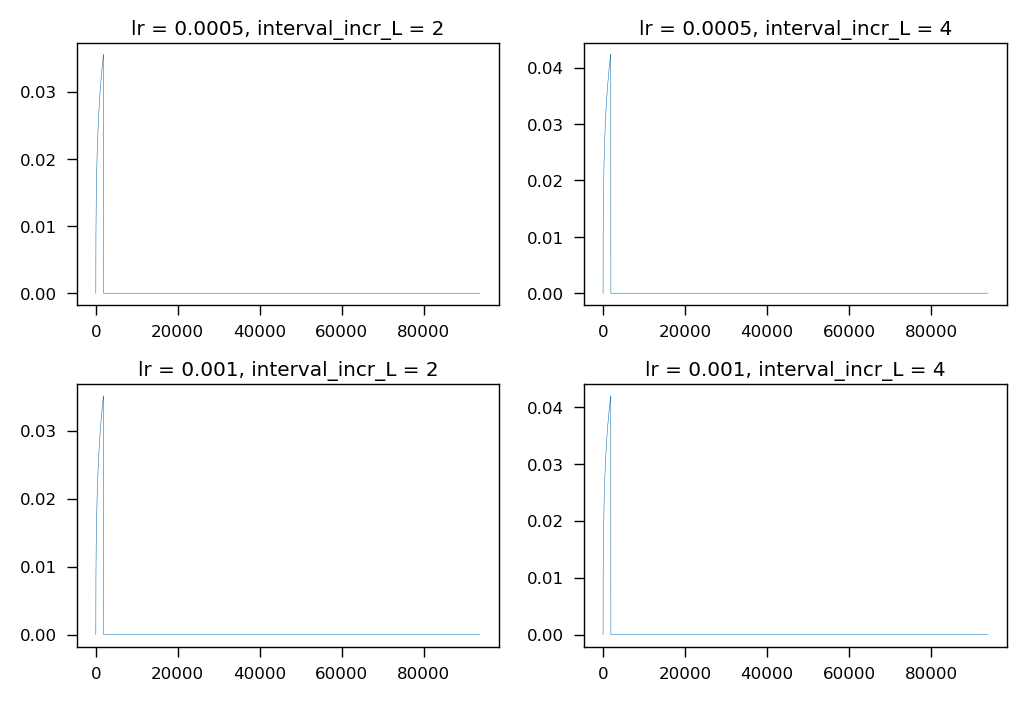

In [23]:
plot_history_various_hyperparams(hist_lambda)